## 分析拉勾网的深圳数据分析职位
### 1. 导包

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import jieba
import jieba.analyse
import re
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
# from matplotlib.font_manager import FontProperties
import pprint
# 让图表直接在jupyter中展示出来
%matplotlib inline
# 解决中文乱码问题
plt.rcParams["font.sans-serif"] = 'SimHei'
# 解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus'] = False
# import matplotlib as mpl
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

### 2. 读取及查看基本数据

In [2]:
data = pd.read_csv('./lagou_DT.csv')

In [3]:
data.head()

,company,foursquare,trend,figure,job,salary,experience,education,description,address
0,YIDATEC,"移动互联网,游戏",不需要融资,2000人以上,数据分析师,7k-10k,经验1-3年,本科及以上,1、1年以上数据分析\数据运营相关工作经验；2、接触过Android App运营、对App质...,南山区
1,希为科技,"企业服务,金融",不需要融资,50-150人,数据分析师,15k-25k,经验1-3年,本科及以上,职位诱惑：14薪；年轻有活力的团队；五险一金；职位描述：岗位职责:1.深入理解业务，通过数据...,南山区
2,传易,"移动互联网,社交",不需要融资,150-500人,数据分析专员(J10236),10k-15k,经验不限,学历不限,工作职责:1、负责运营数据整理规划工作，监控日常关键数据并分析异常变化，提交数据分析报告；2...,南山区
3,盛业资本,"金融,数据服务",上市公司,150-500人,数据分析师,15k-30k,经验3-5年,学历不限,岗位职责:1、基于业务需求，规划分析思路，完成从数据提取、数据清洗、数据分析和报告产出的整个...,福田区
4,路行通,"移动互联网,消费生活",不需要融资,500-2000人,数据分析师（碰撞场景探索与...,14k-20k,经验3-5年,本科及以上,岗位职责：1.负责车辆碰撞场景的深度探索及数据建模。2.负责车辆碰撞数据的新特征挖掘和衍生，...,南山区


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
company        436 non-null object
foursquare     436 non-null object
trend          436 non-null object
figure         436 non-null object
job            436 non-null object
salary         436 non-null object
experience     436 non-null object
education      436 non-null object
description    436 non-null object
address        436 non-null object
dtypes: object(10)
memory usage: 34.1+ KB


In [5]:
data.describe()

,company,foursquare,trend,figure,job,salary,experience,education,description,address
count,436,436,436,436,436,436,436,436,436,436
unique,261,65,8,57,279,92,7,4,431,6
top,字节跳动,金融,不需要融资,2000人以上,数据分析师,15k-30k,经验3-5年,本科及以上,【岗位职责】1.通过对用户行为进行数据挖掘和量化分析，为运营和产品提供深度洞见 2.建设业务...,南山区
freq,7,71,129,127,53,50,189,324,2,292


### 3. 分析目标——将从多维度（区域、薪资情况、工作年限、学历、所在行业、公司规模、职位要求）进行分析，分析数据分析师的区域分布、薪资分布及其各个字段之间的关联。
### 3.1. 不同区域数据分析师职位的需求情况

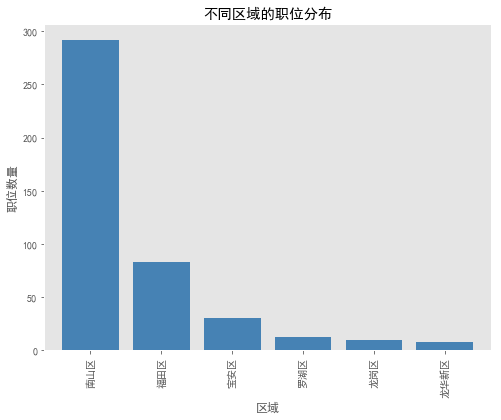

In [6]:
plt.figure(figsize = (8,6))
data['address'].value_counts().sort_values(ascending=False).plot.bar(width = 0.8,color = 'steelblue')
plt.ylabel('职位数量')
plt.xlabel('区域')
plt.title('不同区域的职位分布')
plt.grid(False)

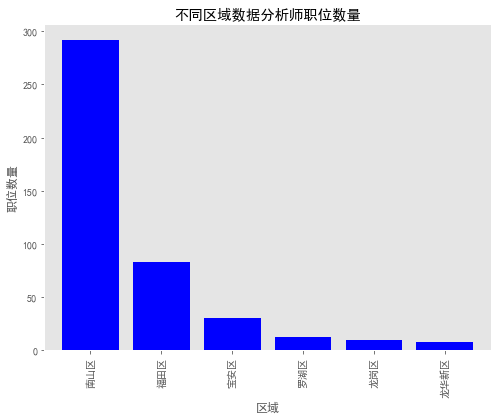

In [7]:
plt.figure(figsize = (8,6))
data['address'].value_counts().sort_values(ascending = False).plot.bar(width = 0.8,color = 'blue')
plt.xlabel('区域')
plt.ylabel('职位数量')
plt.title('不同区域数据分析师职位数量')
plt.grid(False)

#### 小结：不难看出南山区的需求遥遥领先于其他区，不愧是深圳互联网聚集地（比如有腾讯、中兴等），当然福田和宝安也相对是需求比较多的，其余区域很少甚至部分新区都还没有需求。这说明了数据分析师确实是一个朝阳产业，因此优先在南山、福田、宝安求职。
### 3.2. 不同行业数据分析师职位的需求情况

### 3.2. 不同行业数据分析师岗位的需求情况

In [8]:
# 存在多个行业，只取第一个
clean_foursquare = [str(i.split(',')[0]) for i in data.foursquare]
data['foursquare'] = clean_foursquare

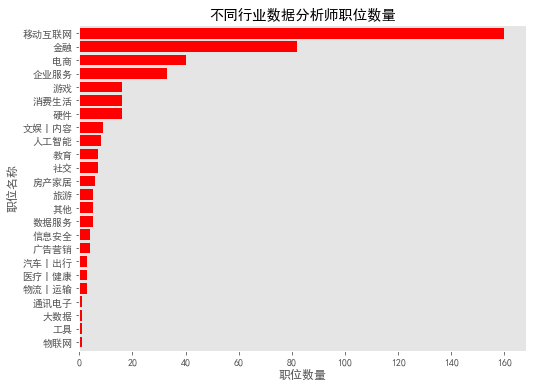

In [9]:
plt.figure(figsize = (8,6))
data['foursquare'].value_counts().sort_values(ascending = True).plot.barh(width = 0.8,color = 'red')
plt.xlabel('职位数量')
plt.ylabel('职位名称')
plt.title('不同行业数据分析师职位数量')
plt.grid(False)

#### 小结：可以发现数分析师岗位主要集中于移动互联网行业领域，此外，数据分析岗位也开始融入传统行业例如金融、电商、企业服务、消费生活等，可以预见在不久的将来这种的占比会不断增大，其发展势头不容小觑。
### 3.3. 数据分析师对应聘者工作年限的要求

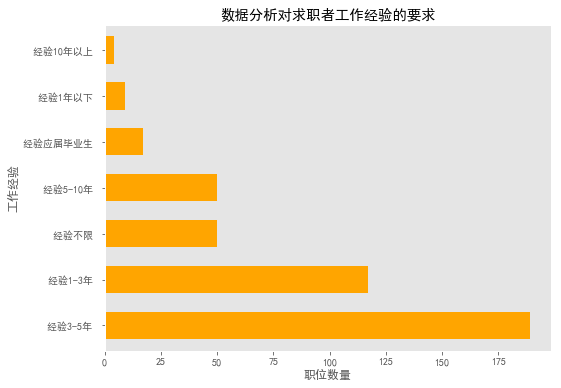

In [10]:
plt.figure(figsize = (8,6))
data['experience'].value_counts().plot.barh(width = 0.6,color = 'orange')
plt.xlabel('职位数量')
plt.ylabel('工作经验')
plt.title('数据分析对求职者工作经验的要求',loc = "center")
plt.grid(False)

#### 小结：大部分企业都是需要求职者有一定的工作经验的（谁都想招一个能直接上手的员工，而不是还要花一段时间去培养他），甚至是超过3年的工作经验，对我们这种应届生其实很不利。终究我们还得加把劲~~
### 3.4. 数据分析师对求职者学历的要求

([<matplotlib.patches.Wedge at 0x1e50eb6f5c0>,
 [Text(-1.379238185118261, -0.3377899180136765, '本科及以上'),
  Text(1.39940283915846, -0.240980691664792, '学历不限'),
  Text(1.2464528281742129, 0.680261234480186, '硕士及以上'),
  Text(0.8711903060686427, 1.1213507259604485, '大专及以上')],
 [Text(-0.7964614871809674, -0.19506178364170051, '74.3%'),
  Text(0.8081058648661529, -0.13915786420079537, '12.6%'),
  Text(0.7197826190865172, 0.3928269100519384, '8.7%'),
  Text(0.5030817260396386, 0.6475405600616674, '4.4%')])

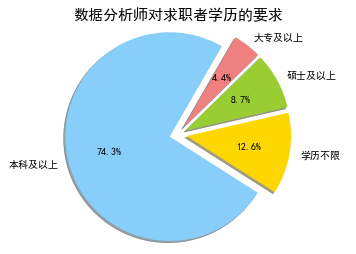

In [11]:
education_count = data['education'].value_counts()
labels='本科及以上','学历不限','硕士及以上','大专及以上'
colors=[ 'lightskyblue', 'gold','yellowgreen', 'lightcoral']
explode=(0.1,0.1,0.1,0.1)
plt.axis('equal')
plt.title('数据分析师对求职者学历的要求',size = 15)
plt.pie(education_count,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True,labeldistance=1.1,startangle=60,radius=1.2)

#### 小结：可以发现，数据分析师岗位对学历的要求不算太高，大部分公司要求具备本科学历即可，这是因为数据分析师岗位仅仅要求求职者具备基本的数学知识以及编程，不像算法岗要求那么高，所以对大多数人来说数据分析师还是一个不错的岗位选择。
### 3.5. 数据分析师的薪酬范围分布

In [12]:
# 去除字段中'k'或'K'字符
clean_salary = [re.sub('[k|K]','',i) for i in data.salary]

# 将salary数据转换为DataFrame格式
salary = pd.DataFrame(clean_salary,columns = ['salary'])
salary_s = pd.DataFrame((x.split('-') for x in salary['salary']),columns = ['bottomSalary','topSalary'])
# 更改字段格式
salary_s['bottomSalary']=salary_s['bottomSalary'].astype(np.int)
salary_s['topSalary']=salary_s['topSalary'].astype(np.int)

# 计算平均值
salary_avg = [(salary_s['bottomSalary'][i] + salary_s['topSalary'][i])/2 for i in range(len(salary_s))]
salary_s['avgSalary'] = salary_avg
# for i in range(len(salary_s)):
#     avg.append((salary_s['bottomSalary'][i]+salary_s['topSalary'][i])/2)
# salary_s['avgSalary']=avg

# 将salary_s表与原表进行拼接
data = pd.merge(data,salary_s,right_index=True,left_index=True)
data.head()

,company,foursquare,trend,figure,job,salary,experience,education,description,address,bottomSalary,topSalary,avgSalary
0,YIDATEC,移动互联网,不需要融资,2000人以上,数据分析师,7k-10k,经验1-3年,本科及以上,1、1年以上数据分析\数据运营相关工作经验；2、接触过Android App运营、对App质...,南山区,7,10,8.5
1,希为科技,企业服务,不需要融资,50-150人,数据分析师,15k-25k,经验1-3年,本科及以上,职位诱惑：14薪；年轻有活力的团队；五险一金；职位描述：岗位职责:1.深入理解业务，通过数据...,南山区,15,25,20.0
2,传易,移动互联网,不需要融资,150-500人,数据分析专员(J10236),10k-15k,经验不限,学历不限,工作职责:1、负责运营数据整理规划工作，监控日常关键数据并分析异常变化，提交数据分析报告；2...,南山区,10,15,12.5
3,盛业资本,金融,上市公司,150-500人,数据分析师,15k-30k,经验3-5年,学历不限,岗位职责:1、基于业务需求，规划分析思路，完成从数据提取、数据清洗、数据分析和报告产出的整个...,福田区,15,30,22.5
4,路行通,移动互联网,不需要融资,500-2000人,数据分析师（碰撞场景探索与...,14k-20k,经验3-5年,本科及以上,岗位职责：1.负责车辆碰撞场景的深度探索及数据建模。2.负责车辆碰撞数据的新特征挖掘和衍生，...,南山区,14,20,17.0


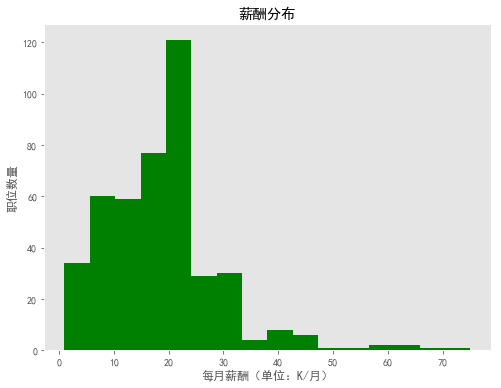

In [13]:
plt.figure(figsize = (8,6))
plt.hist(data['avgSalary'],bins=16,color='green')
plt.axis('tight') 
plt.title('薪酬分布')
plt.xlabel('每月薪酬（单位：K/月）')
plt.ylabel('职位数量')
plt.grid(False)

#### 小结：可以发现数据分析师的薪酬分布范围主要在 6K-25K 之间，尤其集中在20K左右，少量岗位甚至高达40K以上，好好干，有钱途。
### 3.6. 公司规模与薪酬之间的关系

{'boxes': [<matplotlib.lines.Line2D at 0x1e50ec70be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e50ec83438>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e50ec83e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e50ec83ac8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e50ec70d68>,
  <matplotlib.lines.Line2D at 0x1e50ecb4e48>]}

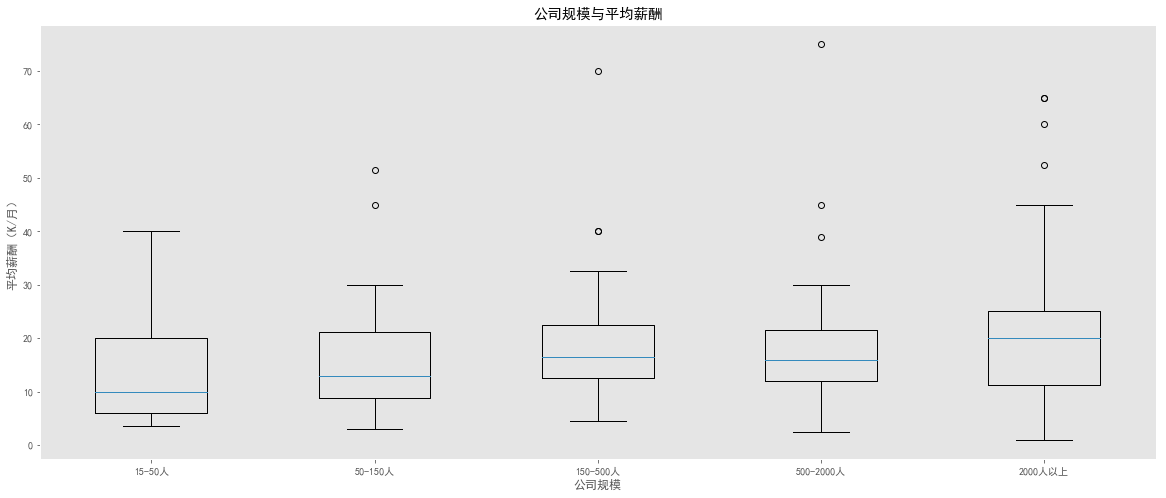

In [14]:
data['figure'] = data['figure'].map(str.strip)
data.groupby(['figure']).count()

size1=data.loc[data['figure'] == '15-50人',['figure','avgSalary']]
size2=data.loc[data['figure'] == '50-150人',['figure','avgSalary']]
size3=data.loc[data['figure'] == '150-500人',['figure','avgSalary']]
size4=data.loc[data['figure'] == '500-2000人',['figure','avgSalary']]
size5=data.loc[data['figure'] == '2000人以上',['figure','avgSalary']]

plt.figure(figsize = (20,8))
plt.xlabel('公司规模')
plt.ylabel('平均薪酬（K/月）')
plt.title('公司规模与平均薪酬')
plt.grid(False)
plt.boxplot((size1['avgSalary'],size2['avgSalary'],size3['avgSalary'],size4['avgSalary'],size5['avgSalary']),
            labels=('15-50人','50-150人','150-500人','500-2000人','2000人以上'))
# plt.grid(color='#95a5a6',linestyle='--',linewidth=0.8,axis='y',alpha=0.4)

#### 小结：如箱形图所示，随着公司的规模增大，平均薪酬有明显上涨的趋势。另外大厂（2000人以上）是工资待遇虽然比较高，但是差距也大。
### 3.7. 工作经验与薪酬的关系

In [15]:
data['experience'] = data['experience'].map(str.strip)

# 把经验应届毕业生和经验不限归为经验1年以下
for i in range(len(data['experience'])):
    if data['experience'][i] in ['经验应届毕业生','经验不限']:
        data['experience'][i]='经验1年以下'
# data['experience']

{'boxes': [<matplotlib.lines.Line2D at 0x1e50eb09a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e50eafe9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e50eac3198>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e50eafe4a8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e50eb09160>,
  <matplotlib.lines.Line2D at 0x1e50ea6bb70>]}

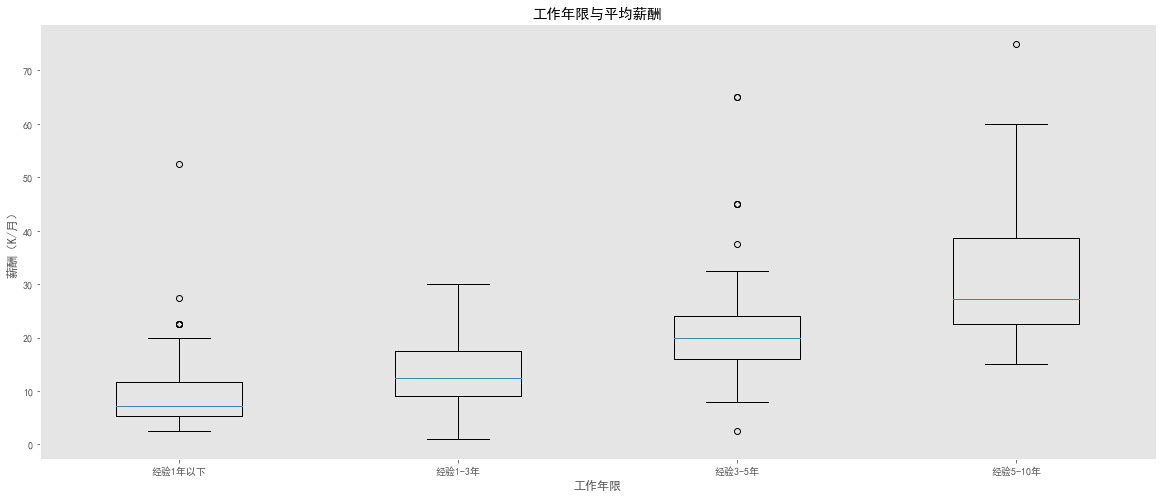

In [16]:
year1=data.loc[data['experience'] == '经验1年以下',['experience','avgSalary']]
year2=data.loc[data['experience'] == '经验1-3年',['experience','avgSalary']]
year3=data.loc[data['experience'] == '经验3-5年',['experience','avgSalary']]
year4=data.loc[data['experience'] == '经验5-10年',['experience','avgSalary']]

plt.figure(figsize = (20,8))
plt.xlabel('工作年限')
plt.ylabel('薪酬（K/月）')
plt.title('工作年限与平均薪酬')
plt.grid(False)
# plt.grid(color='#95a5a6',linestyle='--',linewidth=0.8,axis='y',alpha=0.4)
plt.boxplot((year1['avgSalary'],year2['avgSalary'],year3['avgSalary'],year4['avgSalary']),
            labels=('经验1年以下','经验1-3年','经验3-5年','经验5-10年'))

####  小结：随着工作经验的增长，薪资也跟着涨，工作3年后基本都在22K以上了。不过工作经验在1年以下却有些反常，经验1年以下的薪酬甚至比经验1-3年的都高，这可能由于应届毕业生之间的能力、学历差异造成的，真的是能者多劳啊！
### 3.8. 学历对薪酬的影响

{'boxes': [<matplotlib.lines.Line2D at 0x1e50eb2b4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e50eb2b5c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e50e98ba20>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e50e98bb70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e50eb2bda0>,
  <matplotlib.lines.Line2D at 0x1e50ebd38d0>]}

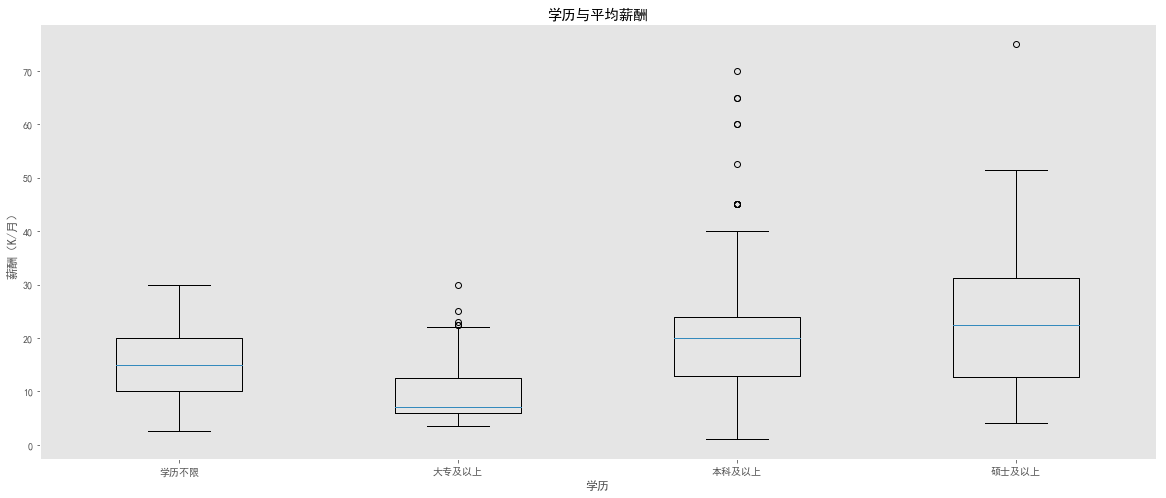

In [17]:
data['education']=data['education'].map(str.strip)
 
edu1=data.loc[data['education'] == '学历不限',['education','avgSalary']]
edu2=data.loc[data['education'] == '大专及以上',['education','avgSalary']]
edu3=data.loc[data['education'] == '本科及以上',['education','avgSalary']]
edu4=data.loc[data['education'] == '硕士及以上',['education','avgSalary']]

plt.figure(figsize = (20,8))
plt.xlabel('学历')
plt.ylabel('薪酬（K/月）')
plt.title('学历与平均薪酬')
plt.grid(False)
# plt.grid(color='#95a5a6',linestyle='--',linewidth=0.8,axis='y',alpha=0.4)
plt.boxplot((edu1['avgSalary'],edu2['avgSalary'],edu3['avgSalary'],edu4['avgSalary']),labels=('学历不限','大专及以上','本科及以上','硕士及以上'))

#### 小结：学历不同，工资待遇的区别还是挺明显的。其中，本科及以上学历的薪酬待遇的极差较大，这是因为大部分公司都要求求职者具备本科及以上的学历；硕士及以上则更上一层楼，好歹人家比你多花三年时间。
### 3.9. 职业技能关键词

In [18]:
# 把每个岗位描述连接起来保存在文件中
description_text = ' '.join([i for i in data['description']])

with open('des.txt','w',encoding = 'utf-8') as f:
    f.write(description_text)
    f.close()

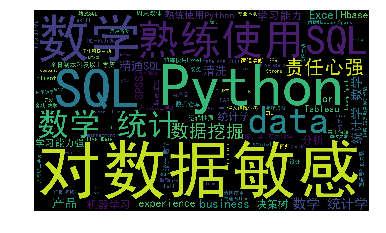

In [19]:
text = open('des.txt', 'r',encoding='utf-8').read()
stop_word = ['岗位职责','任职要求','工作职责','岗位要求','任职资格','本科及以上学历','本科以上学历','职位描述',
             '工作职责','岗位职责1','职位诱惑','职位要求','任职要求1','工作职责1','职位职责','计算机','数据分析',
             'and','to','with','the','in','for','of']
wordcloud = WordCloud(font_path="./SimHei.ttf",
                      stopwords=stop_word,  # 去掉停用词
                      max_words=100,
                      width=2000,
                      height=1200).generate(text)
# 保存词云
wordcloud.to_file('DT.jpg')
# 显示词云文件
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 小结：词云显示出的情况，想要从事数据分析这一职位，数学统计、SQL、Python、Excel是必备技能，还有对数据敏感、责任心强，因为数据就是你的法宝。  从词云上看出，数据分析师技能具备的频率排在前列的有：SQL，Python，数学统计，对数据敏感，Excel， SAS，SPSS, Hadoop，机器学习等
### 4.分析结论
#### 通过上面的分析，我们可以得到如下结论：
#### a、在深圳数据分析师岗位需求主要集中在南山、福田，即互联网聚集地，总体待遇较高（基本上在8K以上），学历要求不是特别高（本科以上），大厂需求量较大，大量的工作经验需求集中在1-3年。
#### b、数据分析师分布的行业领域主要是移动互联网行业，不过也开始向传统行业（例如金融、教育）渗透。
#### c、数据分析师技能具备的频率排在前列的有：SQL，Python，数学统计，对数据敏感，Excel， SAS，SPSS, Hadoop，机器学习等，其中数学统计、SQL、Python、Excel是必备技能。
#### d、机器学习、大数据挖掘是走向高薪的正确方向。